#Problem Statement

####A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

####The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

####Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


# Data description

# Variable	Definition
User_ID -	User ID

Product_ID - Product ID

Gender -	Sex of User

Age -	Age in bins

Occupation- Occupation (Masked)

City_Category- Category of the City (A,B,C)
    
Stay_In_Current_City_Years	- Number of years stay in current city

Marital_Status -Marital Status

Product_Category_1 -	Product Category (Masked)

Product_Category_2- Product may belongs to other category also (Masked)

Product_Category_3- Product may belongs to other category also (Masked)

Purchase - Purchase Amount (Target Variable)




In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv(r'/content/train_oSwQCTC.zip')
test=pd.read_csv(r'/content/test_HujdGe7.zip')

In [ ]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


# Data Exploration

In [ ]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
print('No of unique items:-',train.User_ID.nunique())
print(train.User_ID.value_counts())

No of unique items:- 5891
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005608       7
1000094       7
1002690       7
1002111       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64


#### Since They are 5891  users were participated in the Black Friday Sales

In [ ]:
train.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00062442       1
P00074842       1
P00132742       1
P00301442       1
P00298342       1
Name: Product_ID, Length: 3631, dtype: int64

#### Black Friday sales consists of 3631 unique products and most occuring  products id are P00265242 Followed by P00025442

In [ ]:
train.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

#### Males are high in number with 75%  compared to Females.

In [ ]:
train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

#### The people of age 0-55+ have participated in the sales,40 % of people participated in the sales are around 26-35.

In [ ]:
train.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Most of the people are from city_category B

In [ ]:
train.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

#### Most number of people who participated in the sales stayed for 1 year in a city.

In [ ]:
train.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

#### 60% people of people are Un married in the Black Friday sales

In [ ]:
train.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

#### The sale purchase amount ranges from 12 to 23961,the 50% of the purchase amount is 8047.

# EDA

In [ ]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

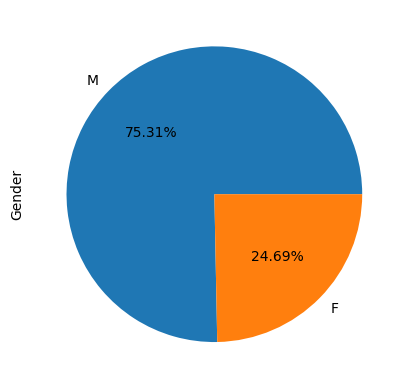

In [ ]:
train.Gender.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

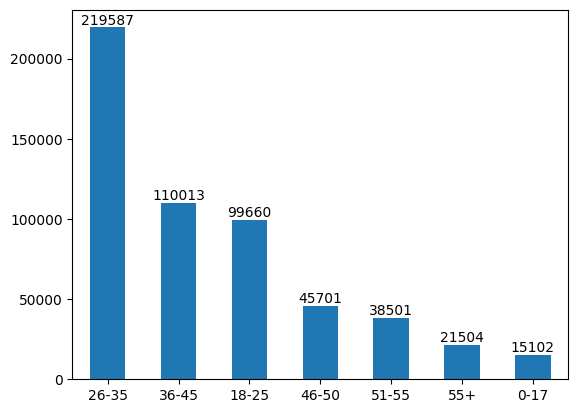

In [ ]:
ax=train.Age.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation='horizontal')
plt.show()

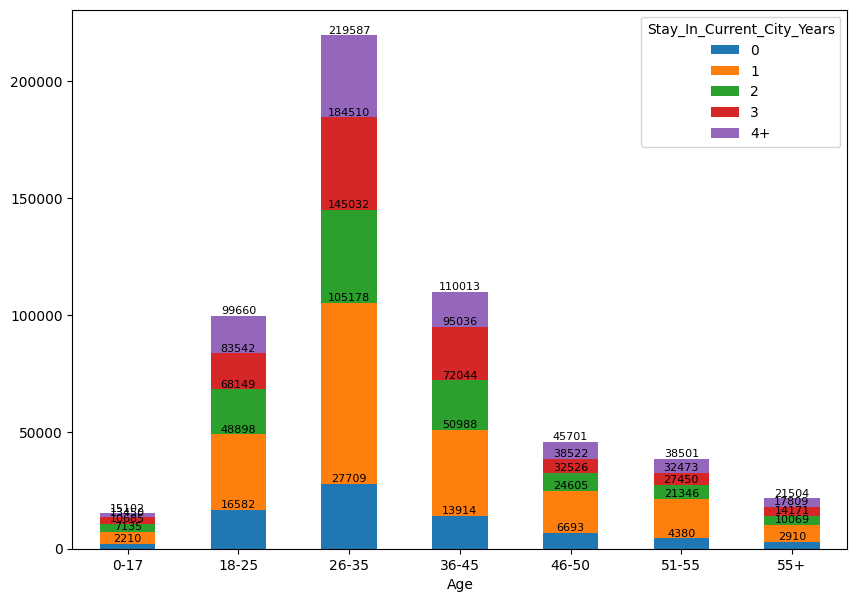

In [ ]:
ax=pd.crosstab(train.Age,train.Stay_In_Current_City_Years).plot(kind='bar',stacked=True,figsize=(10,7))
for i in ax.containers:
    ax.bar_label(i,fmt="%0.0f",fontsize=8)
plt.xticks(rotation='horizontal')
plt.show()

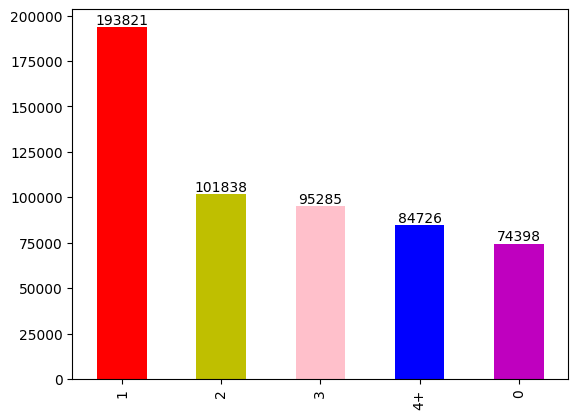

In [ ]:
ax=train.Stay_In_Current_City_Years.value_counts().plot(kind='bar',color=['r','y','pink','b','m'])
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

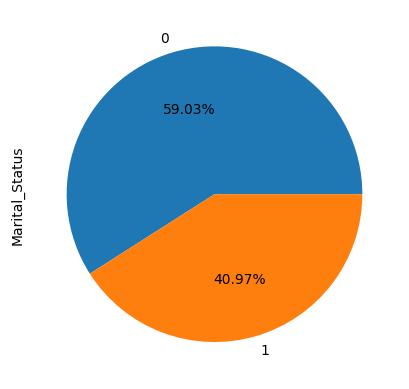

In [ ]:
train.Marital_Status.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

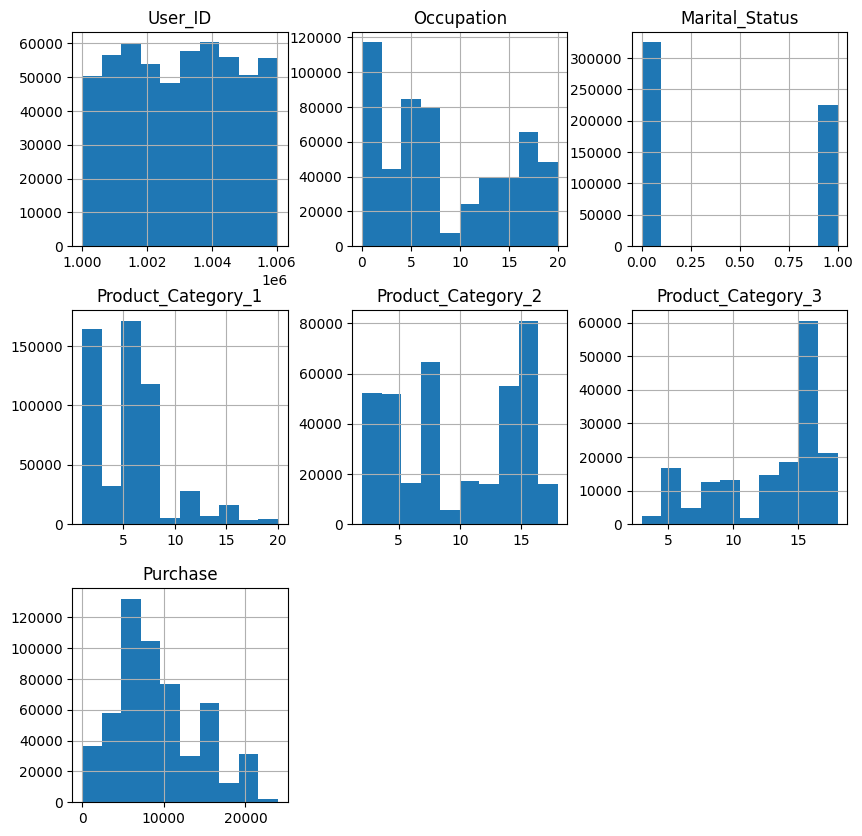

In [ ]:
ax=train.hist(figsize=(10,10))
plt.show()

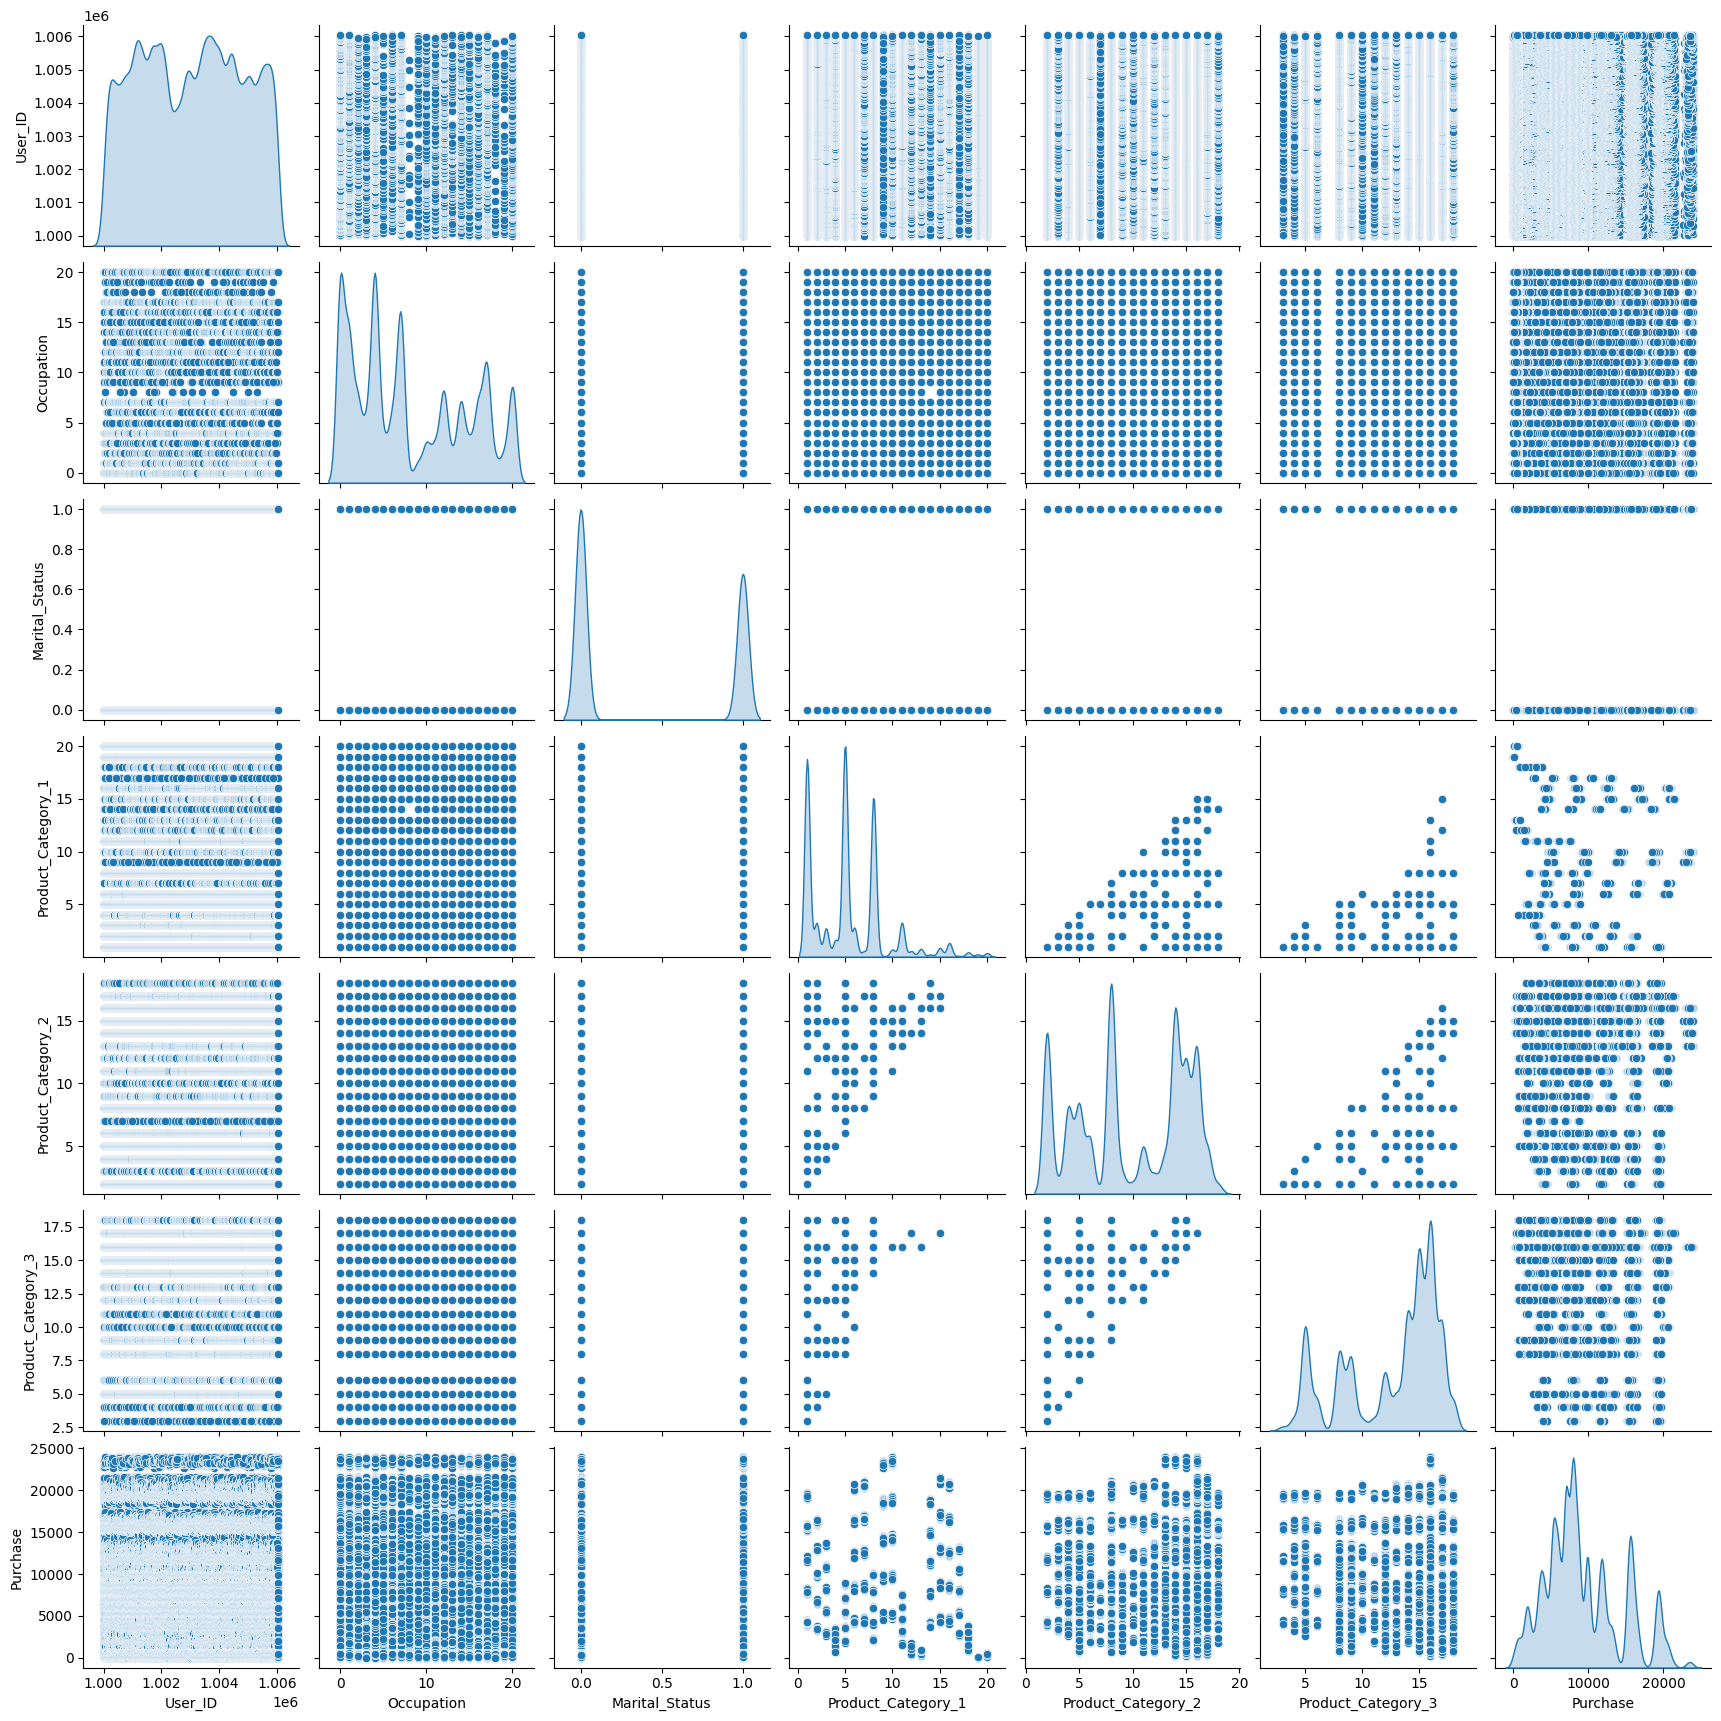

In [ ]:
sns.pairplot(train,diag_kind='kde')

<Figure size 3000x1500 with 0 Axes>

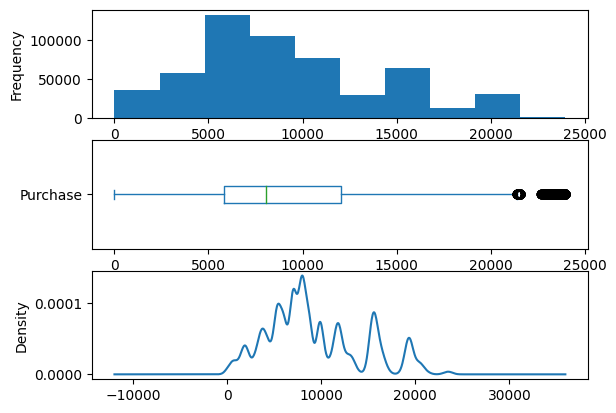

In [ ]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
train.Purchase.plot(kind='hist',ax=ax[0])
train.Purchase.plot(kind='box',vert=False,ax=ax[1])
train.Purchase.plot(kind='kde',ax=ax[2])
plt.show()

<Axes: xlabel='Purchase', ylabel='Density'>

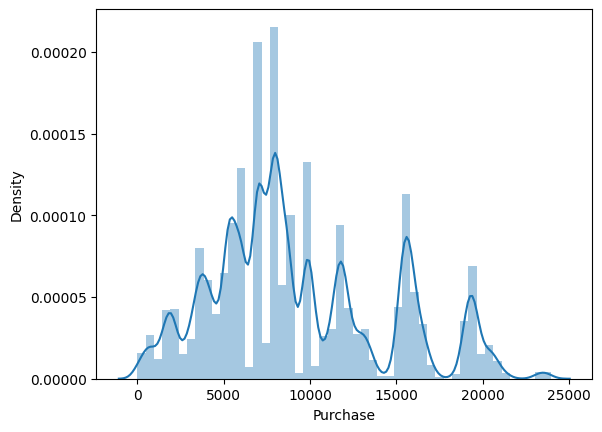

In [ ]:
sns.distplot(train.Purchase)

<Axes: >

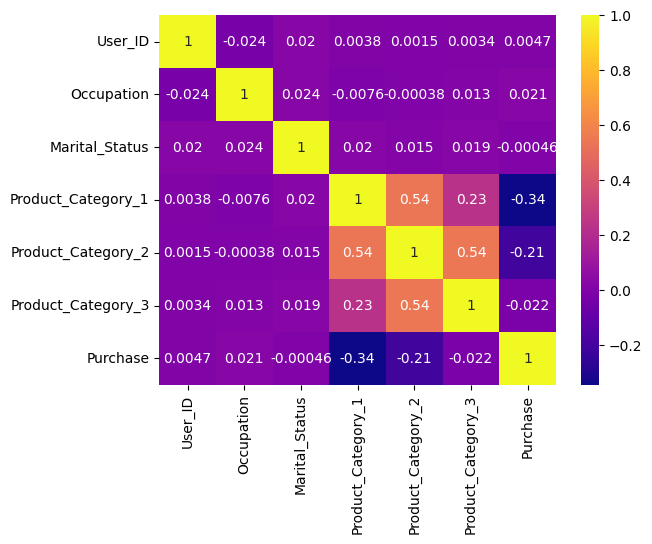

In [ ]:
k=train.select_dtypes(include=['int','float'])
sns.heatmap(k.corr(),annot=True,cmap='plasma')

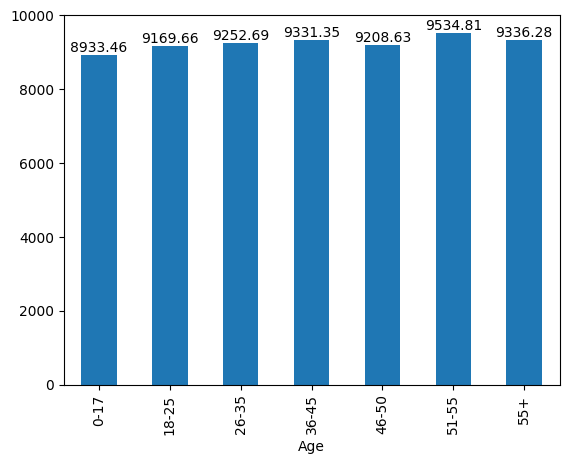

In [ ]:
ax=train.Purchase.groupby(train.Age).mean().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

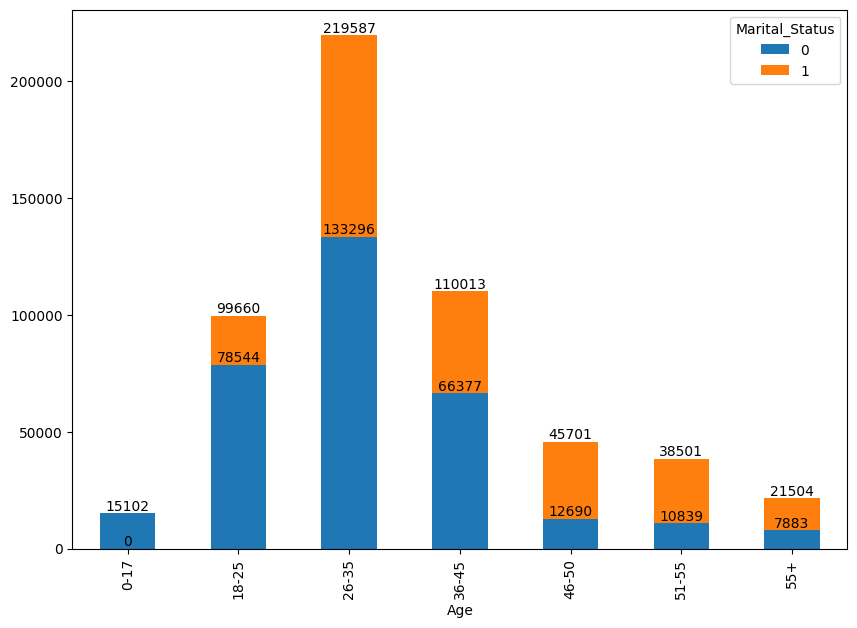

In [ ]:
ax=pd.crosstab(train.Age,train.Marital_Status).plot(kind='bar',stacked=True,figsize=(10,7))
for i in ax.containers:
  ax.bar_label(i)
plt.show()

# Hypothesis Testing

In [ ]:
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

### Ttest

In [ ]:
#Test null average of Gender and Purchase are equal
train.Purchase.groupby(train.Gender).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
train.Purchase.groupby(train.Gender).var()

Gender
F    2.272651e+07
M    2.593036e+07
Name: Purchase, dtype: float64

In [ ]:
Males=train[train.Gender=='F']
females=train[train.Gender=='M']

In [ ]:
ttest_ind(Males['Purchase'],females['Purchase'],equal_var=False)
# Since pvalue=0.0 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

TtestResult(statistic=-46.358248669626064, pvalue=0.0, df=245162.81682463537)

In [ ]:
married=train[train.Marital_Status==1]
unmarried=train[train.Marital_Status==0]

In [ ]:
#Test null average of Marital status and Purchase are equal
train.Purchase.groupby(train.Marital_Status).mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [ ]:
np.round(train.Purchase.groupby(train.Marital_Status).var())

Marital_Status
0    25274226.0
1    25169259.0
Name: Purchase, dtype: float64

In [ ]:
ttest_ind(married['Purchase'],unmarried['Purchase'],equal_var=False)
#since pvalue=0.7309975627344574 is greater than 0.05 Fail to reject null

TtestResult(statistic=-0.34379905124865934, pvalue=0.7309975627344574, df=485276.8977660196)

## ANOVA

In [ ]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
# Test the null average of Purchase and City_Category are equal
Cat_a=train[train.City_Category=='A']
Cat_b=train[train.City_Category=='B']
Cat_c=train[train.City_Category=='C']

In [ ]:
train.Purchase.groupby(train.City_Category).mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [ ]:
Cat_a['Purchase']

0          8370
1         15200
2          1422
3          1057
5         15227
          ...  
550026       62
550040       26
550055      238
550058      121
550062      473
Name: Purchase, Length: 147720, dtype: int64

In [ ]:
f_oneway(Cat_a['Purchase'],Cat_b['Purchase'],Cat_c['Purchase'])
# Since P-value =0.0 is less than 0.05,Reject Null

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

### Chi square test

In [ ]:
#Test null no association between Gender and age
chi2_contingency(pd.crosstab(train.Gender,train.Age))
# since pvalue=4.2750569064909935e-302 is less than 0.05 ,reject Null

Chi2ContingencyResult(statistic=1412.7156576195039, pvalue=4.2750569064909935e-302, dof=6, expected_freq=array([[  3728.60722311,  24605.54865944,  54214.9168521 ,
         27161.65186304,  11283.34516642,   9505.70167507,
          5309.22856083],
       [ 11373.39277689,  75054.45134056, 165372.0831479 ,
         82851.34813696,  34417.65483358,  28995.29832493,
         16194.77143917]]))

In [ ]:
# Test null no association between Occupation and gender
chi2_contingency(pd.crosstab(train.Occupation,train.Gender))
# since pvalue=0.0 is less than 0.05 , reject Null

Chi2ContingencyResult(statistic=41664.592979596964, pvalue=0.0, dof=20, expected_freq=array([[17193.26909037, 52444.73090963],
       [11709.23891955, 35716.76108045],
       [ 6564.44238167, 20023.55761833],
       [ 4357.6955031 , 13292.3044969 ],
       [17852.47855174, 54455.52144826],
       [ 3006.43955475,  9170.56044525],
       [ 5025.546287  , 15329.453713  ],
       [14599.6378575 , 44533.3621425 ],
       [  381.69956078,  1164.30043922],
       [ 1553.21600057,  4737.78399943],
       [ 3192.35143655,  9737.64856345],
       [ 2860.5246515 ,  8725.4753485 ],
       [ 7697.93700233, 23481.06299767],
       [ 1908.00401405,  5819.99598595],
       [ 6742.45362573, 20566.54637427],
       [ 3003.47681559,  9161.52318441],
       [ 6263.97125265, 19107.02874735],
       [ 9886.41365613, 30156.58634387],
       [ 1634.93822218,  4987.06177782],
       [ 2088.97799727,  6372.02200273],
       [ 8286.28761899, 25275.71238101]]))

In [ ]:
# Test null no association  City_Categiry and age
chi2_contingency(pd.crosstab(train.City_Category,train.Age))
# since pvalue=0.0 is less than 0.05 , reject Null

Chi2ContingencyResult(statistic=22368.805059695536, pvalue=0.0, dof=12, expected_freq=array([[ 4055.62119592, 26763.55505138, 58969.78489932, 29543.83887083,
        12272.94029102, 10339.3902572 ,  5774.86943432],
       [ 6346.80556949, 41883.36929252, 92284.20040977, 46234.34784245,
        19206.42042984, 16180.52981268,  9037.32664325],
       [ 4699.57323458, 31013.0756561 , 68333.01469091, 34234.81328672,
        14221.63927914, 11981.07993012,  6691.80392242]]))

# Data Preprocessing

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
# Imputing with median in Product category 2 and product category 3
train.Product_Category_2.fillna(train.Product_Category_2.median(),inplace=True)
train.Product_Category_3.fillna(train.Product_Category_3.median(),inplace=True)

In [9]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Encoding

In [10]:
train.select_dtypes(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [11]:
train.drop('Product_ID',axis=1,inplace=True)

In [12]:
train.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
train.Stay_In_Current_City_Years=train.Stay_In_Current_City_Years.replace(to_replace='4+',value=4).astype('int64')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [15]:
pd.set_option('display.max_columns',None)

In [16]:
train=pd.get_dummies(train)

In [17]:
train.drop('User_ID',axis=1,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Occupation                  550068 non-null  int64  
 1   Stay_In_Current_City_Years  550068 non-null  int64  
 2   Marital_Status              550068 non-null  int64  
 3   Product_Category_1          550068 non-null  int64  
 4   Product_Category_2          550068 non-null  float64
 5   Product_Category_3          550068 non-null  float64
 6   Purchase                    550068 non-null  int64  
 7   Gender_F                    550068 non-null  uint8  
 8   Gender_M                    550068 non-null  uint8  
 9   Age_0-17                    550068 non-null  uint8  
 10  Age_18-25                   550068 non-null  uint8  
 11  Age_26-35                   550068 non-null  uint8  
 12  Age_36-45                   550068 non-null  uint8  
 13  Age_46-50     

In [19]:
x=train.drop('Purchase',axis=1)
y=train.Purchase

In [20]:
from sklearn.preprocessing import StandardScaler
X_ss=StandardScaler().fit_transform(x)

In [21]:
X_ss=pd.DataFrame(X_ss,columns=x.columns)

In [22]:
X_ss

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,0.294864,0.109801,-0.833018,-0.610809,-0.136401,0.171658,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
1,0.294864,0.109801,-0.833018,-1.118912,-0.846289,0.171658,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
2,0.294864,0.109801,-0.833018,1.675656,-0.136401,0.171658,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
3,0.294864,0.109801,-0.833018,1.675656,1.046745,0.171658,1.746513,-1.746513,5.951766,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,1.650370,-0.851422,-0.672143
4,1.214734,1.660861,-0.833018,0.659449,-0.136401,0.171658,-0.572570,0.572570,-0.168017,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,4.957802,-0.605925,-0.851422,1.487778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.754799,-0.665728,1.200454,3.708069,-0.136401,0.171658,-0.572570,0.572570,-0.168017,-0.470389,-0.815136,-0.499998,-0.301016,3.645149,-0.201702,-0.605925,1.174506,-0.672143
550064,-1.084943,0.885331,-0.833018,3.708069,-0.136401,0.171658,1.746513,-1.746513,-0.168017,-0.470389,1.226789,-0.499998,-0.301016,-0.274337,-0.201702,-0.605925,-0.851422,1.487778
550065,1.061423,1.660861,1.200454,3.708069,-0.136401,0.171658,1.746513,-1.746513,-0.168017,-0.470389,1.226789,-0.499998,-0.301016,-0.274337,-0.201702,-0.605925,1.174506,-0.672143
550066,-1.084943,0.109801,-0.833018,3.708069,-0.136401,0.171658,1.746513,-1.746513,-0.168017,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,4.957802,-0.605925,-0.851422,1.487778


## Model Building

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [24]:
 LR=LinearRegression().fit(X_ss,y)
 LR.score(X_ss,y)

0.1272163368176198

In [25]:
lrpred=LR.predict(X_ss)

In [26]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(LR,X_ss,y)
print(cv)
cv.mean()

[0.1098147  0.10666706 0.10747836 0.10773451 0.19084854]


0.12450863612778167

In [27]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y,lrpred)))


4692.688660725256


## Decision Tree

In [28]:
DT=DecisionTreeRegressor(max_depth=15).fit(X_ss,y)
DT.score(X_ss,y)

0.68640825103506

In [29]:
dtpred=DT.predict(X_ss)

In [30]:
cv=cross_val_score(DT,X_ss,y)
print(cv)
cv.mean()

[0.632905   0.63518995 0.63590326 0.63474695 0.66233452]


0.6402159393814293

In [31]:
print(np.sqrt(mean_squared_error(y,dtpred)))

2812.877058547186


## RandomForest

In [32]:
RF=RandomForestRegressor(max_depth=15,n_estimators=1000).fit(X_ss,y)

In [33]:
RF.score(X_ss,y)

0.695366669523708

In [34]:
rfpred=RF.predict(X_ss)

In [35]:
print(np.sqrt(mean_squared_error(y,rfpred)))

2772.408020964144


# Gradient Boost

In [36]:
GBM=GradientBoostingRegressor(n_estimators=7000).fit(X_ss,y)

In [37]:
GBM.score(X_ss,y)

0.6714222709603674

In [38]:
gbpred=GBM.predict(X_ss)

In [39]:
print(np.sqrt(mean_squared_error(y,gbpred)))

2879.3038584044043


## Xg Boost

In [40]:
xg=XGBRegressor(n_jobs=-1,n_estimators=900,max_depth=8).fit(X_ss,y)

In [41]:
xg.score(X_ss,y)

0.7406368752840546

# Test Data Cleaning

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [43]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [44]:
# Imputing with median in Product category 2 and product category 3
test.Product_Category_2.fillna(test.Product_Category_2.median(),inplace=True)
test.Product_Category_3.fillna(test.Product_Category_3.median(),inplace=True)

In [45]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [46]:
test.select_dtypes(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00128942,M,46-50,B,2
1,P00113442,M,26-35,C,0
2,P00288442,F,36-45,B,4+
3,P00145342,F,36-45,B,4+
4,P00053842,F,26-35,C,1
...,...,...,...,...,...
233594,P00118942,F,26-35,B,4+
233595,P00254642,F,26-35,B,4+
233596,P00031842,F,26-35,B,4+
233597,P00124742,F,46-50,C,4+


In [47]:
test.drop('Product_ID',axis=1,inplace=True)

In [48]:
test.Stay_In_Current_City_Years=test.Stay_In_Current_City_Years.replace(to_replace='4+',value=4).astype('int64')

In [49]:
test.drop('User_ID',axis=1,inplace=True)

In [50]:
test=pd.get_dummies(test)

In [51]:
test

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,7,2,1,1,11.0,14.0,0,1,0,0,0,0,1,0,0,0,1,0
1,17,0,0,3,5.0,14.0,0,1,0,0,1,0,0,0,0,0,0,1
2,1,4,1,5,14.0,14.0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,4,1,4,9.0,14.0,1,0,0,0,0,1,0,0,0,0,1,0
4,1,1,0,4,5.0,12.0,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,15,4,1,8,9.0,14.0,1,0,0,0,1,0,0,0,0,0,1,0
233595,15,4,1,5,8.0,14.0,1,0,0,0,1,0,0,0,0,0,1,0
233596,15,4,1,1,5.0,12.0,1,0,0,0,1,0,0,0,0,0,1,0
233597,1,4,0,10,16.0,14.0,1,0,0,0,0,0,1,0,0,0,0,1


In [52]:
from sklearn.preprocessing import StandardScaler
X_ss=StandardScaler().fit_transform(test)

### Model Predictions

In [53]:
lrpredict=LR.predict(X_ss)

In [59]:
pd.DataFrame(lrpredict).to_csv('lrpredict.csv')

In [54]:
lrpredict

array([-1.42369571e+14, -2.22263114e+13, -4.89538034e+11, ...,
       -1.40596818e+13, -1.50536201e+14, -1.42369571e+14])

In [55]:
dtpredict=DT.predict(X_ss)

In [56]:
dtpredict

array([13337.91842739, 10608.32394366,  6216.41166282, ...,
       13949.42857143, 19513.94067797,  2422.89719626])

In [60]:
pd.DataFrame(dtpredict).to_csv('dtpredict.csv')

In [61]:
rfpredict=RF.predict(X_ss)

In [62]:
pd.DataFrame(rfpredict).to_csv('rfpredict.csv')

In [63]:
xgpredict=xg.predict(X_ss)

In [65]:
pd.DataFrame(xgpredict).to_csv('XGBOOST.csv')

In [66]:
gbmpredict=GBM.predict(X_ss)

In [67]:
pd.DataFrame(gbmpredict).to_csv('GradientBoost.csv')

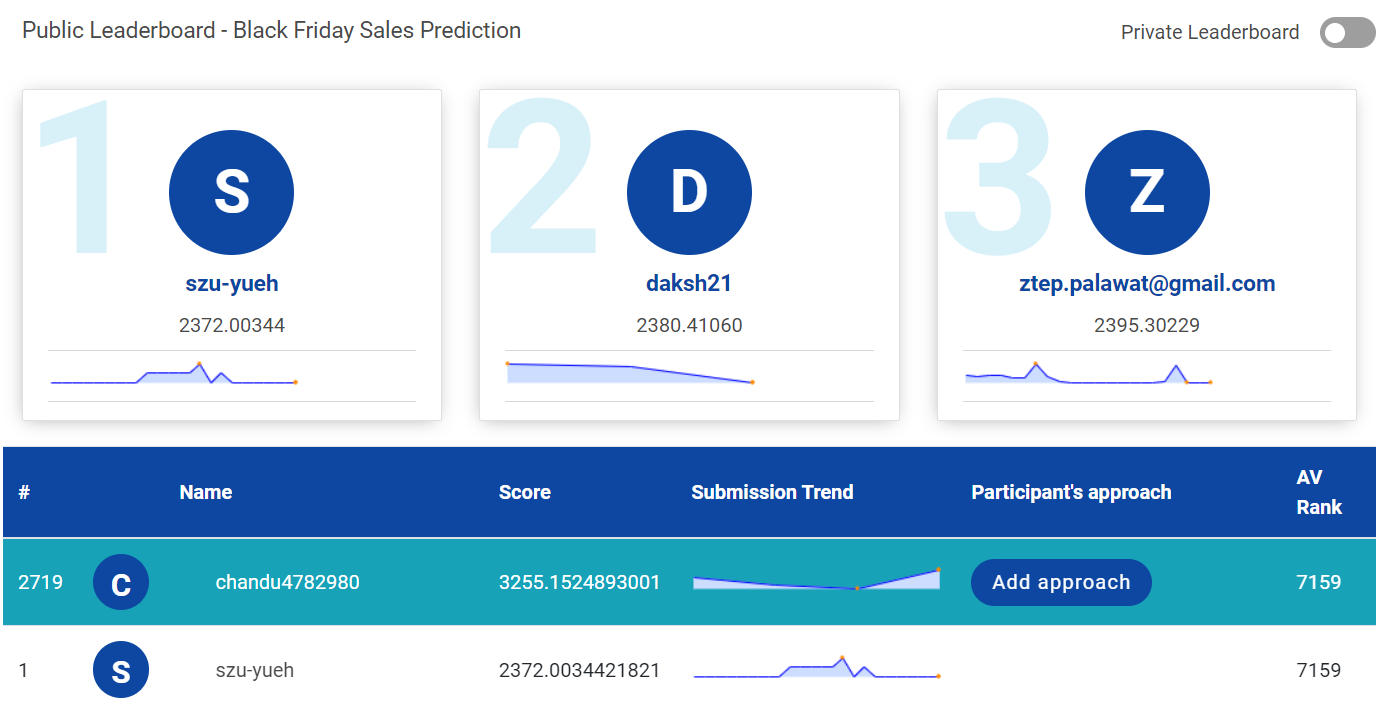